In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



import warnings
warnings.filterwarnings('ignore')

In [33]:
#load file

file_path = ("/content/cleanned_housing_datasets.csv")
df = pd.read_csv(file_path)
#house_price_dataframe = pd.DataFrame(df)
print(df)
df = df.drop(columns=['date'])

               id        date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  2014-10-13  221900         3          1         1180   
1      6414100192  2014-12-09  538000         3          2         2570   
2      5631500400  2015-02-25  180000         2          1          770   
3      2487200875  2014-12-09  604000         4          3         1960   
4      1954400510  2015-02-18  510000         3          2         1680   
...           ...         ...     ...       ...        ...          ...   
21608   263000018  2014-05-21  360000         3          2         1530   
21609  6600060120  2015-02-23  400000         4          2         2310   
21610  1523300141  2014-06-23  402101         2          0         1020   
21611   291310100  2015-01-16  400000         3          2         1600   
21612  1523300157  2014-10-15  325000         2          0         1020   

       sqft_lot  floors  condition  grade  sqft_above  sqft_basement  \
0          5650       1    

In [34]:
print(df.shape)

(21613, 18)


In [35]:
print(df.isnull().sum)

<bound method DataFrame.sum of           id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      False  False     False      False        False     False   False   
1      False  False     False      False        False     False   False   
2      False  False     False      False        False     False   False   
3      False  False     False      False        False     False   False   
4      False  False     False      False        False     False   False   
...      ...    ...       ...        ...          ...       ...     ...   
21608  False  False     False      False        False     False   False   
21609  False  False     False      False        False     False   False   
21610  False  False     False      False        False     False   False   
21611  False  False     False      False        False     False   False   
21612  False  False     False      False        False     False   False   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_ren

In [36]:
#stastical measure of dataset

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [38]:
#Understanding correlation between various feature in the file data
#1.positive 2.negative Range +1 to -1 , +1: strong relationship, 0 : No relation, -1:week realtion

# select only numeric value

df = df.drop(columns=['id'])


numeric_df = df.select_dtypes(include=[np.number])

correlation = numeric_df.corr()

print(correlation)



                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.510072     0.702035  0.089661  0.237211   
bedrooms       0.308350  1.000000   0.467452     0.576671  0.031703  0.155643   
bathrooms      0.510072  0.467452   1.000000     0.697875  0.085310  0.484822   
sqft_living    0.702035  0.576671   0.697875     1.000000  0.172826  0.353321   
sqft_lot       0.089661  0.031703   0.085310     0.172826  1.000000 -0.008951   
floors         0.237211  0.155643   0.484822     0.353321 -0.008951  1.000000   
condition      0.036362  0.028472  -0.126016    -0.058753 -0.008958 -0.293173   
grade          0.667434  0.356967   0.606631     0.762704  0.113621  0.472608   
sqft_above     0.605567  0.477600   0.639933     0.876597  0.183512  0.517913   
sqft_basement  0.323816  0.303093   0.250880     0.435043  0.015286 -0.235836   
yr_built       0.054012  0.154178   0.433647     0.318049  0.053080  0.578619   
yr_renovated   0.126434  0.0

<Axes: >

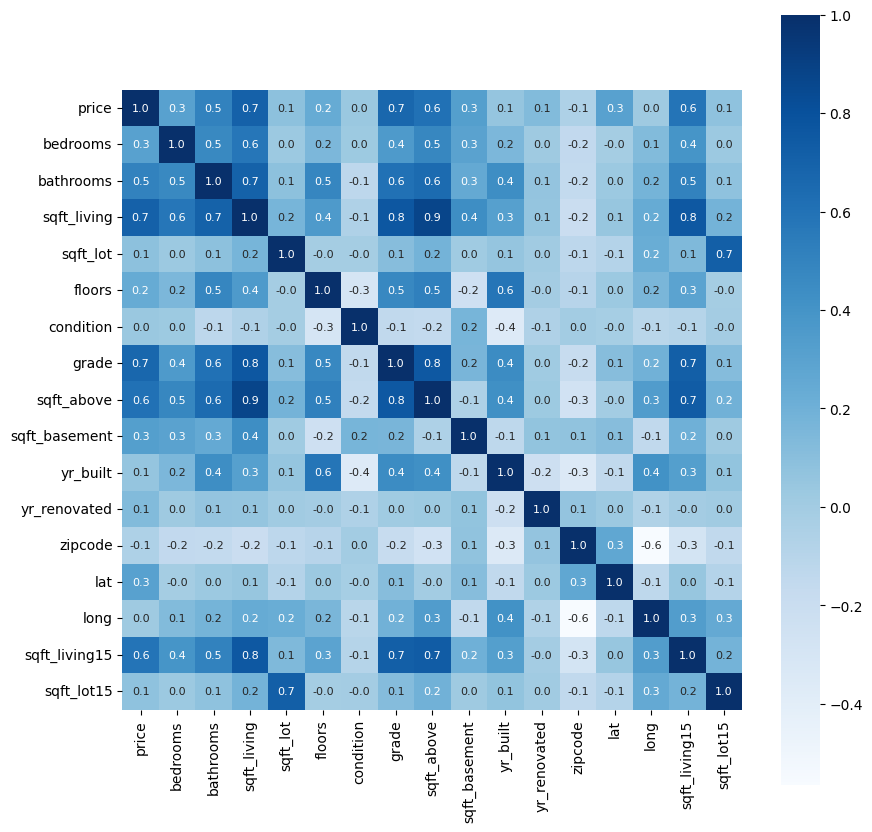

In [39]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [40]:
#splitting data and target target is price


X= df.drop(['price'], axis=1)
Y= df['price']

print(X,Y)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0             3          1         1180      5650       1          3      7   
1             3          2         2570      7242       2          3      7   
2             2          1          770     10000       1          3      6   
3             4          3         1960      5000       1          5      7   
4             3          2         1680      8080       1          3      8   
...         ...        ...          ...       ...     ...        ...    ...   
21608         3          2         1530      1131       3          3      8   
21609         4          2         2310      5813       2          3      8   
21610         2          0         1020      1350       2          3      7   
21611         3          2         1600      2388       2          3      8   
21612         2          0         1020      1076       2          3      7   

       sqft_above  sqft_basement  yr_built  yr_reno

In [41]:
#splitting data into trainning dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(21613, 16) (17290, 16) (4323, 16)


In [42]:
#model Training
#XGBOOST REGRESOOR

model = XGBRegressor()

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [44]:
#Evaluation

#Prediction on data

training_data_prediction = model.predict(X_train)

print(training_data_prediction)

[1800274.4   362200.22  705749.7  ...  979509.25  295095.6   703928.75]


In [45]:
# R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.9721293449401855
Mean Absolute Error: 43095.109375


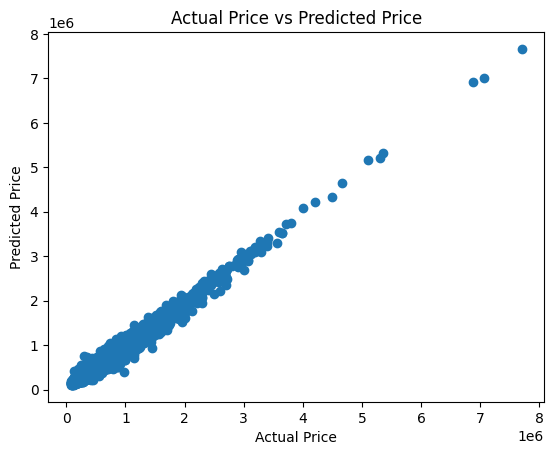

In [46]:
#Visualize the Actual Price OR Predicted Price

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [47]:
#Prediction On Test Data

test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[680977.2  672857.44 423118.03 ... 379003.3  392865.4  238579.16]


In [48]:
# R Squared Error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.8531749248504639
Mean Absolute Error: 73929.2109375
